In [170]:
%matplotlib inline

In [171]:
import pandas as pd 
import numpy as np
import pylab as plt
from sklearn import linear_model
execfile('../toolbox.py')
font = {'family' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 10,6

In [172]:
def select_rich(df):
    rich_countries = ["Luxembourg", "Switzerland", "Qatar", "Norway", "United States", "Singapore", "Australia", 
     "Denmark", "Iceland", "San Marino", "Sweden", "Ireland", "Netherlands", "United Kingdom", 
     "Canada", "Austria", "Finland", "Hong Kong", "Germany", "Belgium", "France", "New Zealand", 
     "Israel", "United Arab Emirates", "Japan", "Kuwait", "Italy", "Brunei", "South Korea", 
     "Spain", "Bahamas", "Bahrain", "Taiwan", "Malta", "Cyprus", "Slovenia", "Trinidad and Tobago", 
     "Saudi Arabia", "Portugal", "Greece", "Estonia", "Czech Republic", "Uruguay", "Barbados", 
     "Slovakia", "Oman", "Saint Kitts and Nevis", "Palau", "Seychelles", "Antigua and Barbuda", "Lithuania"]
    code_country_dict = pd.read_csv("../data_source/country_code_list.csv")
    rich_codes = code_country_dict.query("country in " + str(rich_countries))['code'].values.tolist()
    twenty_obs_list = df.groupby(level=0).size()[df.groupby(level=0).size() >= 20].index.tolist()
    keep_list = list(set(twenty_obs_list) & set(rich_codes))
    return df.query("code in " + str(keep_list)).reset_index().set_index(['code', 'year'])

# Import data

In [173]:
data = pd.read_csv("wilkinson_database.csv", index_col=['code', 'year'])
print data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7456 entries, (AFG, 1990.0) to (ZWE, 2015.0)
Data columns (total 6 columns):
gini_net_SWIID           4612 non-null float64
infant_mortality         4992 non-null float64
D10/D1                   1648 non-null float64
infant_mortality_OECD    2159 non-null float64
OECD_dummy               2159 non-null float64
homicide_rate            1702 non-null float64
dtypes: float64(6)
memory usage: 407.8+ KB
None


# Comparing the different variables

## Gini from SWIID and infant mortality from WHO

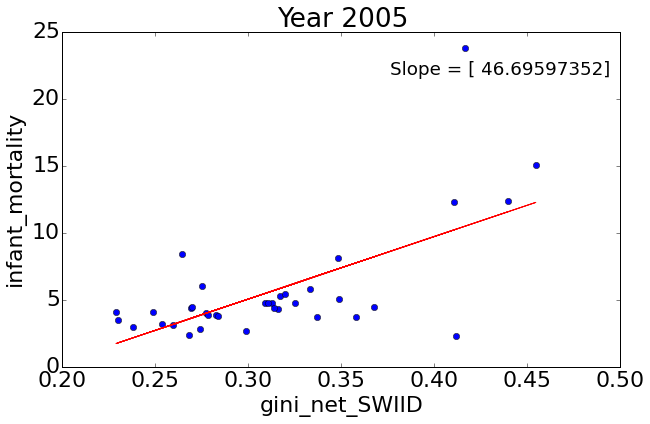

In [174]:
variables = ['gini_net_SWIID', 'infant_mortality']
year = 2005

selected_data = select_rich(data[variables]).dropna(how='any')
X = selected_data.query("year == " + str(year))[[variables[0]]]
Y = selected_data.query("year == " + str(year))[variables[1]]
if len(X) >= 20:
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)

plt.plot(X, Y, 'o')
plt.plot(X, clf.predict(X), 'r')
plt.ylabel(variables[1])
plt.xlabel(variables[0])
plt.title("Year " + str(year))
plt.figtext(0.58, 0.8, 'Slope = ' + str(clf.coef_), size='small')

## Gini from SWIID and infant mortality from OECD

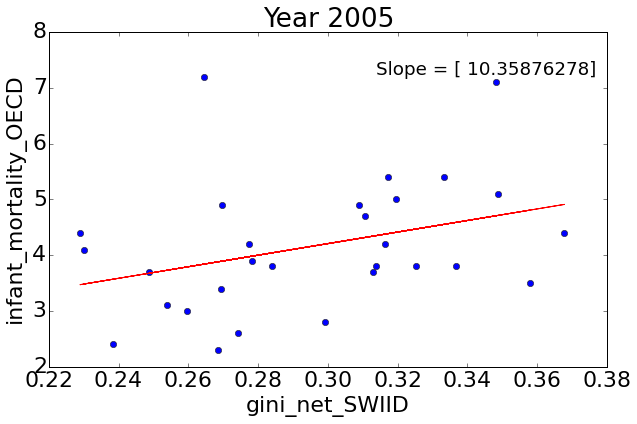

In [175]:
variables = ['gini_net_SWIID', 'infant_mortality_OECD']
year = 2005

selected_data = select_rich(data[variables]).dropna(how='any')
X = selected_data.query("year == " + str(year))[[variables[0]]]
Y = selected_data.query("year == " + str(year))[variables[1]]
if len(X) >= 20:
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)

plt.plot(X, Y, 'o')
plt.plot(X, clf.predict(X), 'r')
plt.ylabel(variables[1])
plt.xlabel(variables[0])
plt.title("Year " + str(year))
plt.figtext(0.58, 0.8, 'Slope = ' + str(clf.coef_), size='small')

## Inequality from WIID and infant mortality from WHO

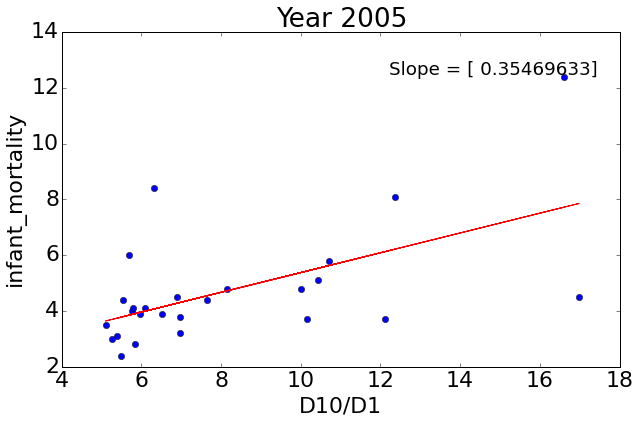

In [176]:
variables = ['D10/D1', 'infant_mortality']
year = 2005

selected_data = select_rich(data[variables]).dropna(how='any')
X = selected_data.query("year == " + str(year))[[variables[0]]]
Y = selected_data.query("year == " + str(year))[variables[1]]
if len(X) >= 20:
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)

plt.plot(X, Y, 'o')
plt.plot(X, clf.predict(X), 'r')
plt.ylabel(variables[1])
plt.xlabel(variables[0])
plt.title("Year " + str(year))
plt.figtext(0.58, 0.8, 'Slope = ' + str(clf.coef_), size='small')

## Inequality from WIID and infant mortality from OECD

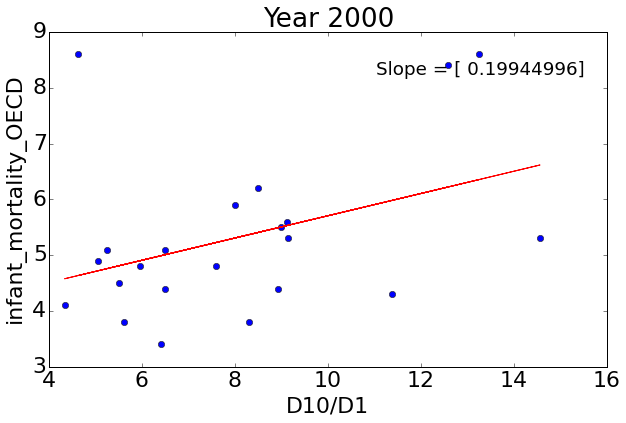

In [177]:
variables = ['D10/D1', 'infant_mortality_OECD']
year = 2000

selected_data = select_rich(data[variables]).dropna(how='any')
X = selected_data.query("year == " + str(year))[[variables[0]]]
Y = selected_data.query("year == " + str(year))[variables[1]]
if len(X) >= 20:
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)

plt.plot(X, Y, 'o')
plt.plot(X, clf.predict(X), 'r')
plt.ylabel(variables[1])
plt.xlabel(variables[0])
plt.title("Year " + str(year))
plt.figtext(0.58, 0.8, 'Slope = ' + str(clf.coef_), size='small')

## Comparing the two data sources for infant mortality

In [178]:
data[["infant_mortality", "infant_mortality_OECD"]].corr()

,infant_mortality,infant_mortality_OECD
infant_mortality,1.000000,0.995561
infant_mortality_OECD,0.995561,1.000000


# Introducing the time-dimesion

### We choose to work with OECD data because because longer time series

In [179]:
data_OECD = data.query("OECD_dummy == 1")

In [180]:
data_OECD["infant_mortality_OECD"].dropna().groupby(level=0).size().sort_values().head(15)

code
TUR    18
KOR    20
COL    23
RUS    33
ZAF    40
ISR    44
CHN    45
CAN    52
NZL    52
MEX    52
CHL    53
USA    53
JPN    54
SWE    54
LTU    54
dtype: int64

In [181]:
data_OECD = data_OECD.query("code not in ['TUR', 'KOR', 'COL', 'RUS', 'ZAF', 'ISR', 'CHN']")
data_OECD.reset_index(inplace=True)
data_OECD.set_index(["code", "year"], inplace=True)
data_OECD = select_rich(data_OECD)

### Testing our hypothesis with the hands

In [182]:
mean_ginis = data_OECD['gini_net_SWIID'].groupby(level=0).mean()
print "Most equal country", mean_ginis.argmin()
print "Most unequal country", mean_ginis.argmax()
print "Middle ranked country", "AUS"

Most equal country SVN
Most unequal country GRC
Middle ranked country AUS


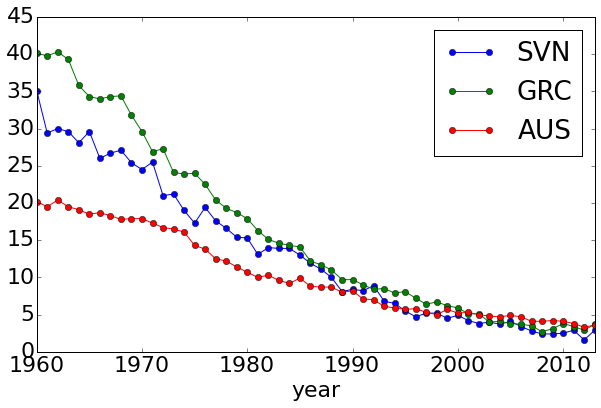

In [183]:
data.dropna(subset=['infant_mortality_OECD']).loc['SVN', 'infant_mortality_OECD'].plot(marker='o', label='SVN')
data.dropna(subset=['infant_mortality_OECD']).loc['GRC', 'infant_mortality_OECD'].plot(marker='o', label='GRC')
data.dropna(subset=['infant_mortality_OECD']).loc['AUS', 'infant_mortality_OECD'].plot(marker='o', label='AUS')
plt.legend()

Il semble que l'on soit fasse à un petit problème d'echelle. La mortalité infantile étant bornée, les pays qui ont un mortalité initiale très grande auront également une décroissance très élevée alors que ceux déjà avancé seront quasiment constant à un niveau plus bas. 

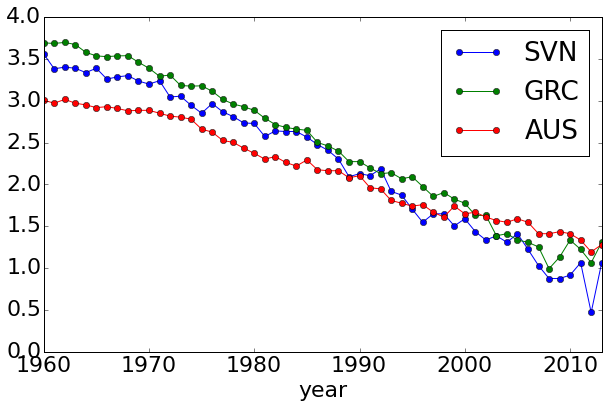

In [184]:
data.dropna(subset=['infant_mortality_OECD']).loc['SVN', 'infant_mortality_OECD'].apply(np.log).plot(marker='o', label='SVN')
data.dropna(subset=['infant_mortality_OECD']).loc['GRC', 'infant_mortality_OECD'].apply(np.log).plot(marker='o', label='GRC')
data.dropna(subset=['infant_mortality_OECD']).loc['AUS', 'infant_mortality_OECD'].apply(np.log).plot(marker='o', label='AUS')
plt.legend()

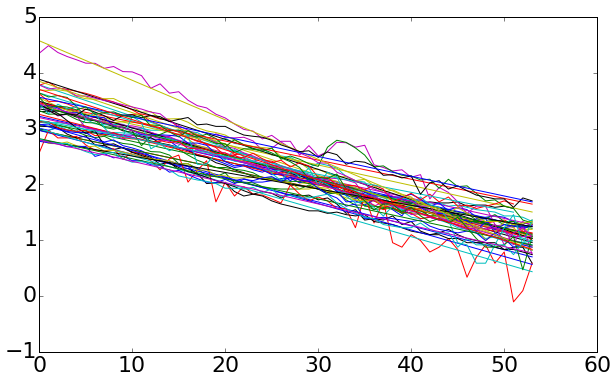

In [185]:
regr_results = pd.DataFrame(columns=["coef", "intercept", "R**2"])
for country in data_OECD.index.levels[0]:
    sel = data_OECD.loc[country, 'infant_mortality_OECD'].apply(np.log).reset_index()
    clf = linear_model.LinearRegression()
    clf.fit(sel[['year']] - sel['year'].min(), sel["infant_mortality_OECD"])
    regr_results.loc[country] = [clf.coef_[0], clf.intercept_, 
                                 clf.score(sel[['year']] - sel['year'].min(), sel["infant_mortality_OECD"])]
    plt.plot(sel[['year']] - sel['year'].min(), sel["infant_mortality_OECD"])
    plt.plot(sel[['year']] - sel['year'].min(), clf.predict(sel[['year']] - sel['year'].min()))

In [186]:
regr_results['gini'] = mean_ginis

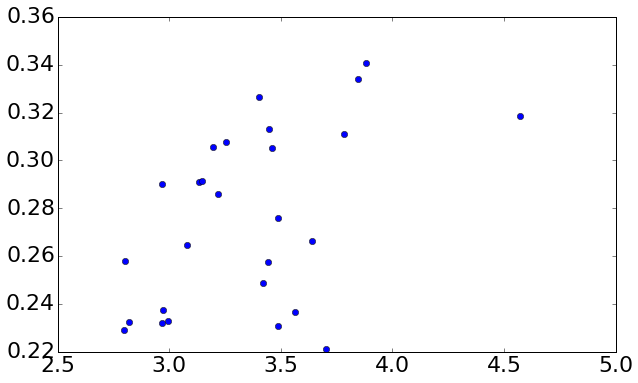

In [187]:
plt.plot(regr_results['intercept'], regr_results['gini'], 'o')

In [188]:
results = pd.DataFrame(columns=["year", "coef"])
results.set_index("year", inplace=True)
for year in data.index.levels[1]:
    X = data.query("year == " + str(year))[['Q1/Q5']]
    Y = data.query("year == " + str(year))['infant_mortality_OECD']
    if len(X) >= 20:
        clf = linear_model.LinearRegression()
        clf.fit(X, Y)
        results.loc[year, "coef"] = clf.coef_[0]

results.plot(marker='o', figsize=(10,6))
plt.axhline()
plt.ylabel("Slope of the regression line")

print "Number of years", len(results)
print "Mean of coefficients", results.mean().values[0]
print "Standard deviation", results.std().values[0]
print "Skewness", results.skew().values[0]
# results[results['coef'] == results['coef'].min()]

KeyError: "['Q1/Q5'] not in index"

In [ ]:
gini_growth = growth(data, 'Q1/Q5', as_rate=True)
for country in data.index.levels[0]:
    gini_growth.loc[country].plot(marker='o', figsize=(12,8))